<font face="Times New Roman" size=5>
<div dir=rtl align="center">
<font face="Times New Roman" size=5>
</font>
<br>
<img src="https://static.tildacdn.one/tild3639-3035-4131-a461-363737393037/noroot.png" alt="University Logo" width="400" height="224">
<br>
<font face="Times New Roman" size=5 align=center>
Sharif University of Technology
<br>
Electrical Engineering Department
</font>
<br>
<font size=6>
Assignment 2: Exploratory Analysis and Data Cleaning
</font>
<br>
<font size=4>
Zahra Helalizadeh 400102193
<br>
</font>
<font size=4>
Spring 2025
<br>
</font>
<font face="Times New Roman" size=4>
</font>
</div></font>

## **1. Introduction**  

### **About the Dataset**  
The **Fashion-MNIST** dataset is a collection of **70,000 grayscale images** of fashion items, categorized into **10 different classes** such as T-shirts, trousers, sneakers, and bags. Each image is **28x28 pixels** and represents a single clothing or accessory item in a structured format. The dataset is widely used as a benchmark for image classification tasks and serves as an alternative to the traditional MNIST handwritten digit dataset.

### **Dataset Source**  
This dataset was created by **Zalando Research** and is publicly available on Kaggle. It is designed for machine learning and deep learning applications in computer vision.

### **Train vs. Test Dataset**  
The dataset is divided into:  
- **Training Set**: 60,000 labeled images used to train models.  
- **Test Set**: 10,000 labeled images used to evaluate model performance.  

Since the test set is used for evaluation, we will perform **Exploratory Data Analysis (EDA), cleaning, and preprocessing on the training dataset** before applying the same transformations to the test set.

### **Key Tasks in This Notebook**  
1. **Exploratory Data Analysis (EDA)**  
   - Understanding the dataset distribution and visualizing images.  
   - Identifying patterns and relationships between classes.  

2. **Data Cleaning**  
   - Checking for missing or corrupt images.  
   - Handling any inconsistencies in the dataset.  

3. **Data Preprocessing**  
   - Converting image data into numerical format suitable for machine learning models.  
   - Encoding class labels into numerical categories.  

4. **Normalization & Standardization**  
   - Scaling pixel values to ensure efficient model training.  
   - Comparing the impact of different normalization techniques.  

By the end of this notebook, we will have a **cleaned, preprocessed, and normalized dataset**, ready for training machine learning or deep learning models.

## **2. Importing Libraries & Loading Data**  

### **Importing Necessary Libraries**  
First, we import the required libraries for data handling, visualization, and preprocessing:  

In [64]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.datasets import fashion_mnist

# Set a style for plots
sns.set_style("whitegrid")

### **Loading the Fashion-MNIST Dataset**  
The **Fashion-MNIST dataset** is available directly in **TensorFlow/Keras**, so we can load it easily:  

In [65]:
# Load the dataset
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()

# Display dataset shapes
print(f"Training data shape: {X_train.shape}, Labels shape: {y_train.shape}")
print(f"Test data shape: {X_test.shape}, Labels shape: {y_test.shape}")

Training data shape: (60000, 28, 28), Labels shape: (60000,)
Test data shape: (10000, 28, 28), Labels shape: (10000,)


#### **Dataset Shape Explanation**
- **X_train**: Training images (60,000 samples, each 28×28 pixels).  
- **y_train**: Corresponding labels for the training images (60,000 labels).  
- **X_test**: Test images (10,000 samples, each 28×28 pixels).  
- **y_test**: Corresponding labels for the test images (10,000 labels).  

### **Displaying the First Few Images**
To understand the dataset better, let’s visualize a few images with their labels:

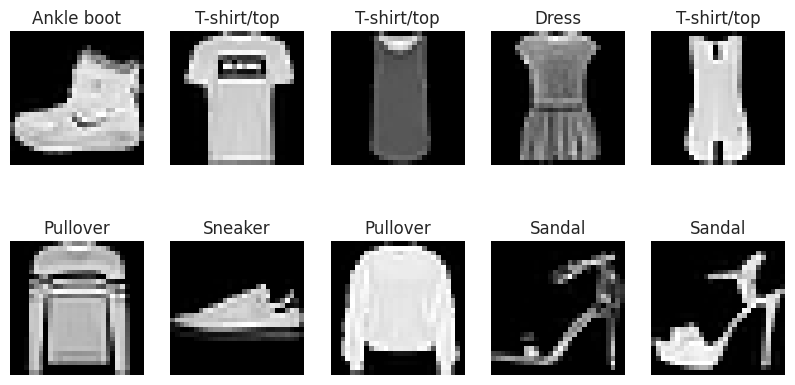

In [66]:
# Define class labels for Fashion-MNIST
class_labels = ["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"]

# Plot the first few images in the dataset
plt.figure(figsize=(10,5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(X_train[i], cmap="gray")  # Display in grayscale
    plt.title(class_labels[y_train[i]])  # Assign the correct class name
    plt.axis("off")
plt.show()

This code:
- Loads the **train** and **test datasets**.
- Prints their **shapes** to understand dimensions.
- Visualizes **some sample images** with their corresponding labels.

## **3. Exploratory Data Analysis (EDA)**  

### **Basic Information & Summary Statistics**  

#### **Checking Data Types & Missing Values**  
Since the dataset consists of **grayscale images**, the features are stored in **numpy arrays** instead of a standard DataFrame. However, we can still inspect their structure:

In [67]:
# Check basic information about the dataset
print("Training Data:")
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")

print("\nTest Data:")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

# Check for missing values
print("\nChecking for missing values in training data:")
print(f"Missing values in X_train: {np.isnan(X_train).sum()}")
print(f"Missing values in y_train: {np.isnan(y_train).sum()}")

print("\nChecking for missing values in test data:")
print(f"Missing values in X_test: {np.isnan(X_test).sum()}")
print(f"Missing values in y_test: {np.isnan(y_test).sum()}")

Training Data:
X_train shape: (60000, 28, 28), y_train shape: (60000,)

Test Data:
X_test shape: (10000, 28, 28), y_test shape: (10000,)

Checking for missing values in training data:
Missing values in X_train: 0
Missing values in y_train: 0

Checking for missing values in test data:
Missing values in X_test: 0
Missing values in y_test: 0



#### **Key Observations**
- `X_train.shape = (60000, 28, 28)`: 60,000 images of size **28×28 pixels**.  
- `y_train.shape = (60000,)`: Labels corresponding to the images.  
- No missing values in `X_train`, `y_train`, `X_test`, or `y_test` (since these are numerical arrays).  

### **Summary Statistics of Pixel Values**  
Since the dataset consists of **pixel values ranging from 0 to 255**, we can compute basic statistics to understand its distribution.

In [68]:
# Convert pixel values to a DataFrame for summary statistics
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten images into 1D arrays
df_train = pd.DataFrame(X_train_flat)

# Show summary statistics of pixel values
df_train.describe()

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
count,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,...,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000,60000.000000
mean,0.000800,0.005783,0.030083,0.103800,0.249683,0.414717,0.821667,2.224733,5.698667,14.434650,...,34.564367,23.208633,16.576250,17.831967,22.918850,17.916900,8.485717,2.706333,0.819000,0.070883
std,0.092554,0.249033,0.767868,2.512017,4.331376,5.827394,8.309935,14.201820,23.835980,38.204702,...,57.557779,48.881430,42.044318,43.911297,51.928401,45.173634,29.448614,17.258682,9.133252,2.075829
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,57.000000,8.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,16.000000,36.000000,119.000000,164.000000,224.000000,230.000000,221.000000,221.000000,254.000000,255.000000,...,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,255.000000,170.000000


#### **Key Insights**
- The **minimum pixel value is 0** (black), and the **maximum is 255** (white).
- The **mean pixel intensity** helps understand brightness distribution.
- The **standard deviation** shows variation in pixel intensities across images.

### **Checking for Duplicate Values**  
Since Fashion-MNIST is an image dataset, duplicates can be identified by comparing entire images.

In [69]:
# Check for duplicate images in the training dataset
unique_images = np.unique(X_train.reshape(X_train.shape[0], -1), axis=0)
num_duplicates = X_train.shape[0] - unique_images.shape[0]

print(f"Number of duplicate images in the training dataset: {num_duplicates}")

Number of duplicate images in the training dataset: 0


#### **Why Check for Duplicates?**
- If duplicate images exist, they could introduce **bias** in training.  
- Removing duplicates helps improve **model generalization**.

### **Univariate Analysis**

#### **Histograms & Boxplots for Numerical Variables**  
Since the Fashion-MNIST dataset consists of pixel values for images, we'll focus on visualizing the distribution of these pixel values. First, let's plot the **histogram** and **boxplot** of the pixel values for a sample image from the training set.

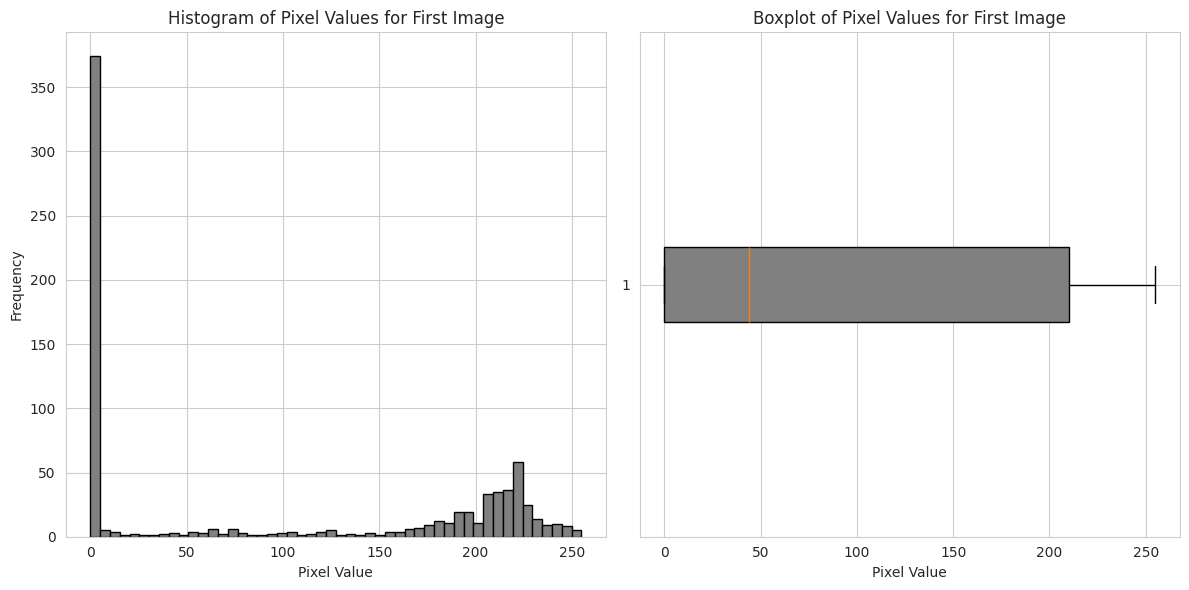

In [70]:
# Flatten the images into a 1D array for each image in X_train
X_train_flat = X_train.reshape(X_train.shape[0], -1)  # Flatten the images

# Plot histograms of pixel values (showing pixel distribution for the first image)
plt.figure(figsize=(12, 6))

# Histogram of pixel values
plt.subplot(1, 2, 1)
plt.hist(X_train_flat[0], bins=50, color='gray', edgecolor='black')
plt.title("Histogram of Pixel Values for First Image")
plt.xlabel("Pixel Value")
plt.ylabel("Frequency")

# Boxplot of pixel values
plt.subplot(1, 2, 2)
plt.boxplot(X_train_flat[0], vert=False, patch_artist=True, boxprops=dict(facecolor='gray', color='black'))
plt.title("Boxplot of Pixel Values for First Image")
plt.xlabel("Pixel Value")

plt.tight_layout()
plt.show()

The **histogram** shows the distribution of pixel intensities, and the **boxplot** highlights the range, median, and outliers in pixel values.

#### **Count Plots for Categorical Variables (Labels)**  
Now, let's visualize the distribution of the target variable **(labels)** using a count plot. Each label corresponds to one of the ten classes in the Fashion-MNIST dataset.



<ipython-input-71-39a76c18198c>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_train, palette="Set2")


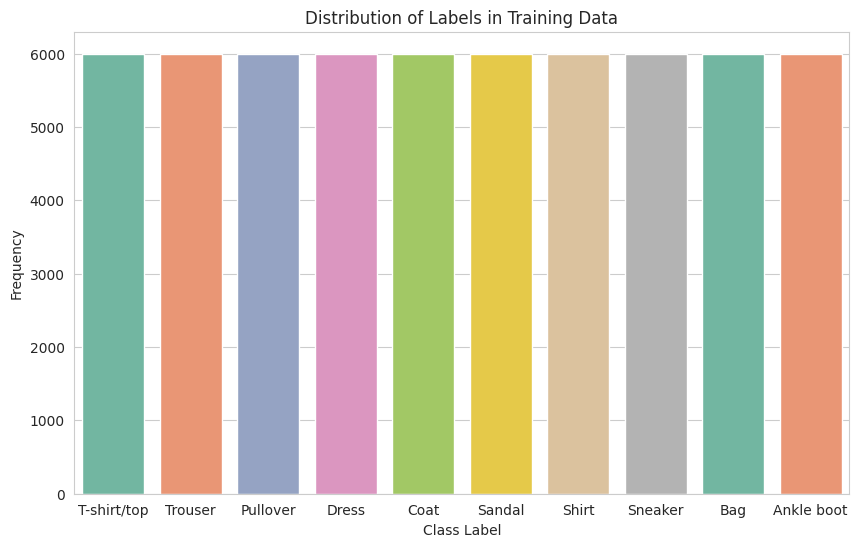

In [71]:
# Plot count plot for the training labels
plt.figure(figsize=(10, 6))
sns.countplot(x=y_train, palette="Set2")
plt.title("Distribution of Labels in Training Data")
plt.xlabel("Class Label")
plt.ylabel("Frequency")
plt.xticks(ticks=np.arange(10), labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                                       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])
plt.show()

This **count plot** visualizes the frequency of each class in the dataset.

### **Bivariate/Multivariate Analysis**

#### **Correlation Heatmap**  
Although the dataset consists of images, which are not directly correlated like traditional numeric variables, we can still calculate the correlation between flattened pixel values. Let's display a correlation heatmap using a small sample of flattened pixel values.

/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2897: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.11/dist-packages/numpy/lib/function_base.py:2898: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


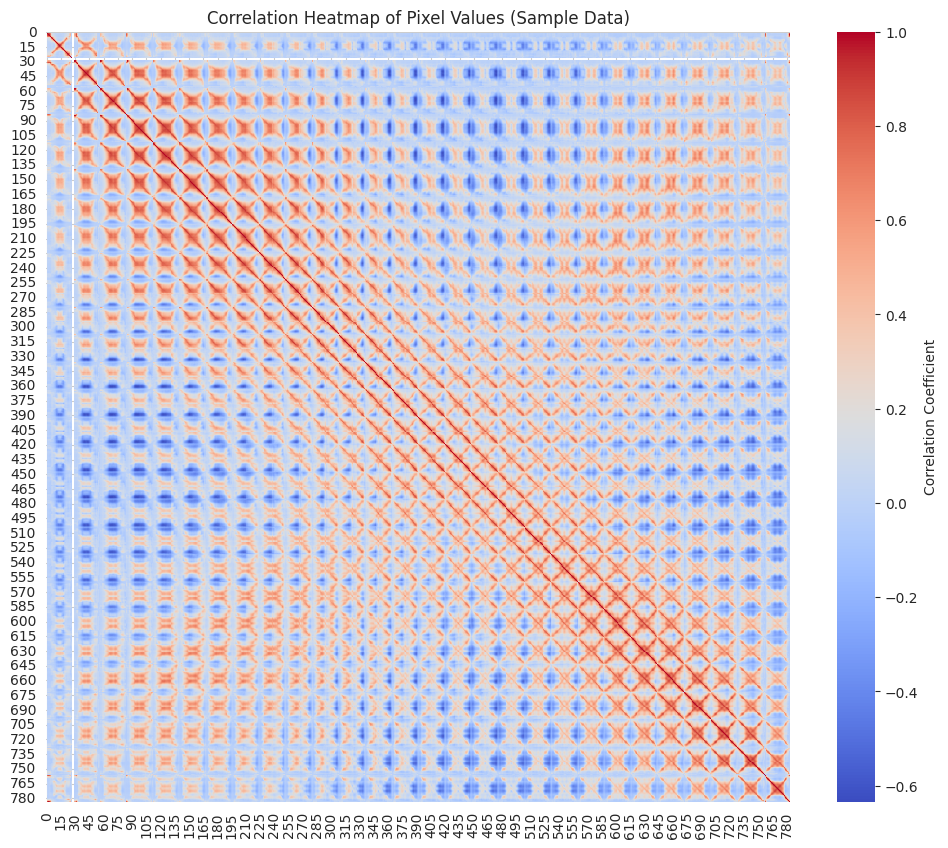

In [72]:
# For the sake of visualization, let's use a subset of the dataset (e.g., first 1000 images)
sample_data = X_train_flat[:1000, :]

# Compute the correlation matrix
corr_matrix = np.corrcoef(sample_data.T)

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, cmap="coolwarm", annot=False, fmt=".2f", cbar_kws={'label': 'Correlation Coefficient'})
plt.title("Correlation Heatmap of Pixel Values (Sample Data)")
plt.show()

#### **Scatter Plots or Pair Plots**  
We can visualize relationships between numerical variables using scatter plots or pair plots. However, given that **Fashion-MNIST** is a high-dimensional image dataset, we’ll limit this analysis to a subset of pixels or a pair of features.

Here, we will plot a **pair plot** using a small subset of data:

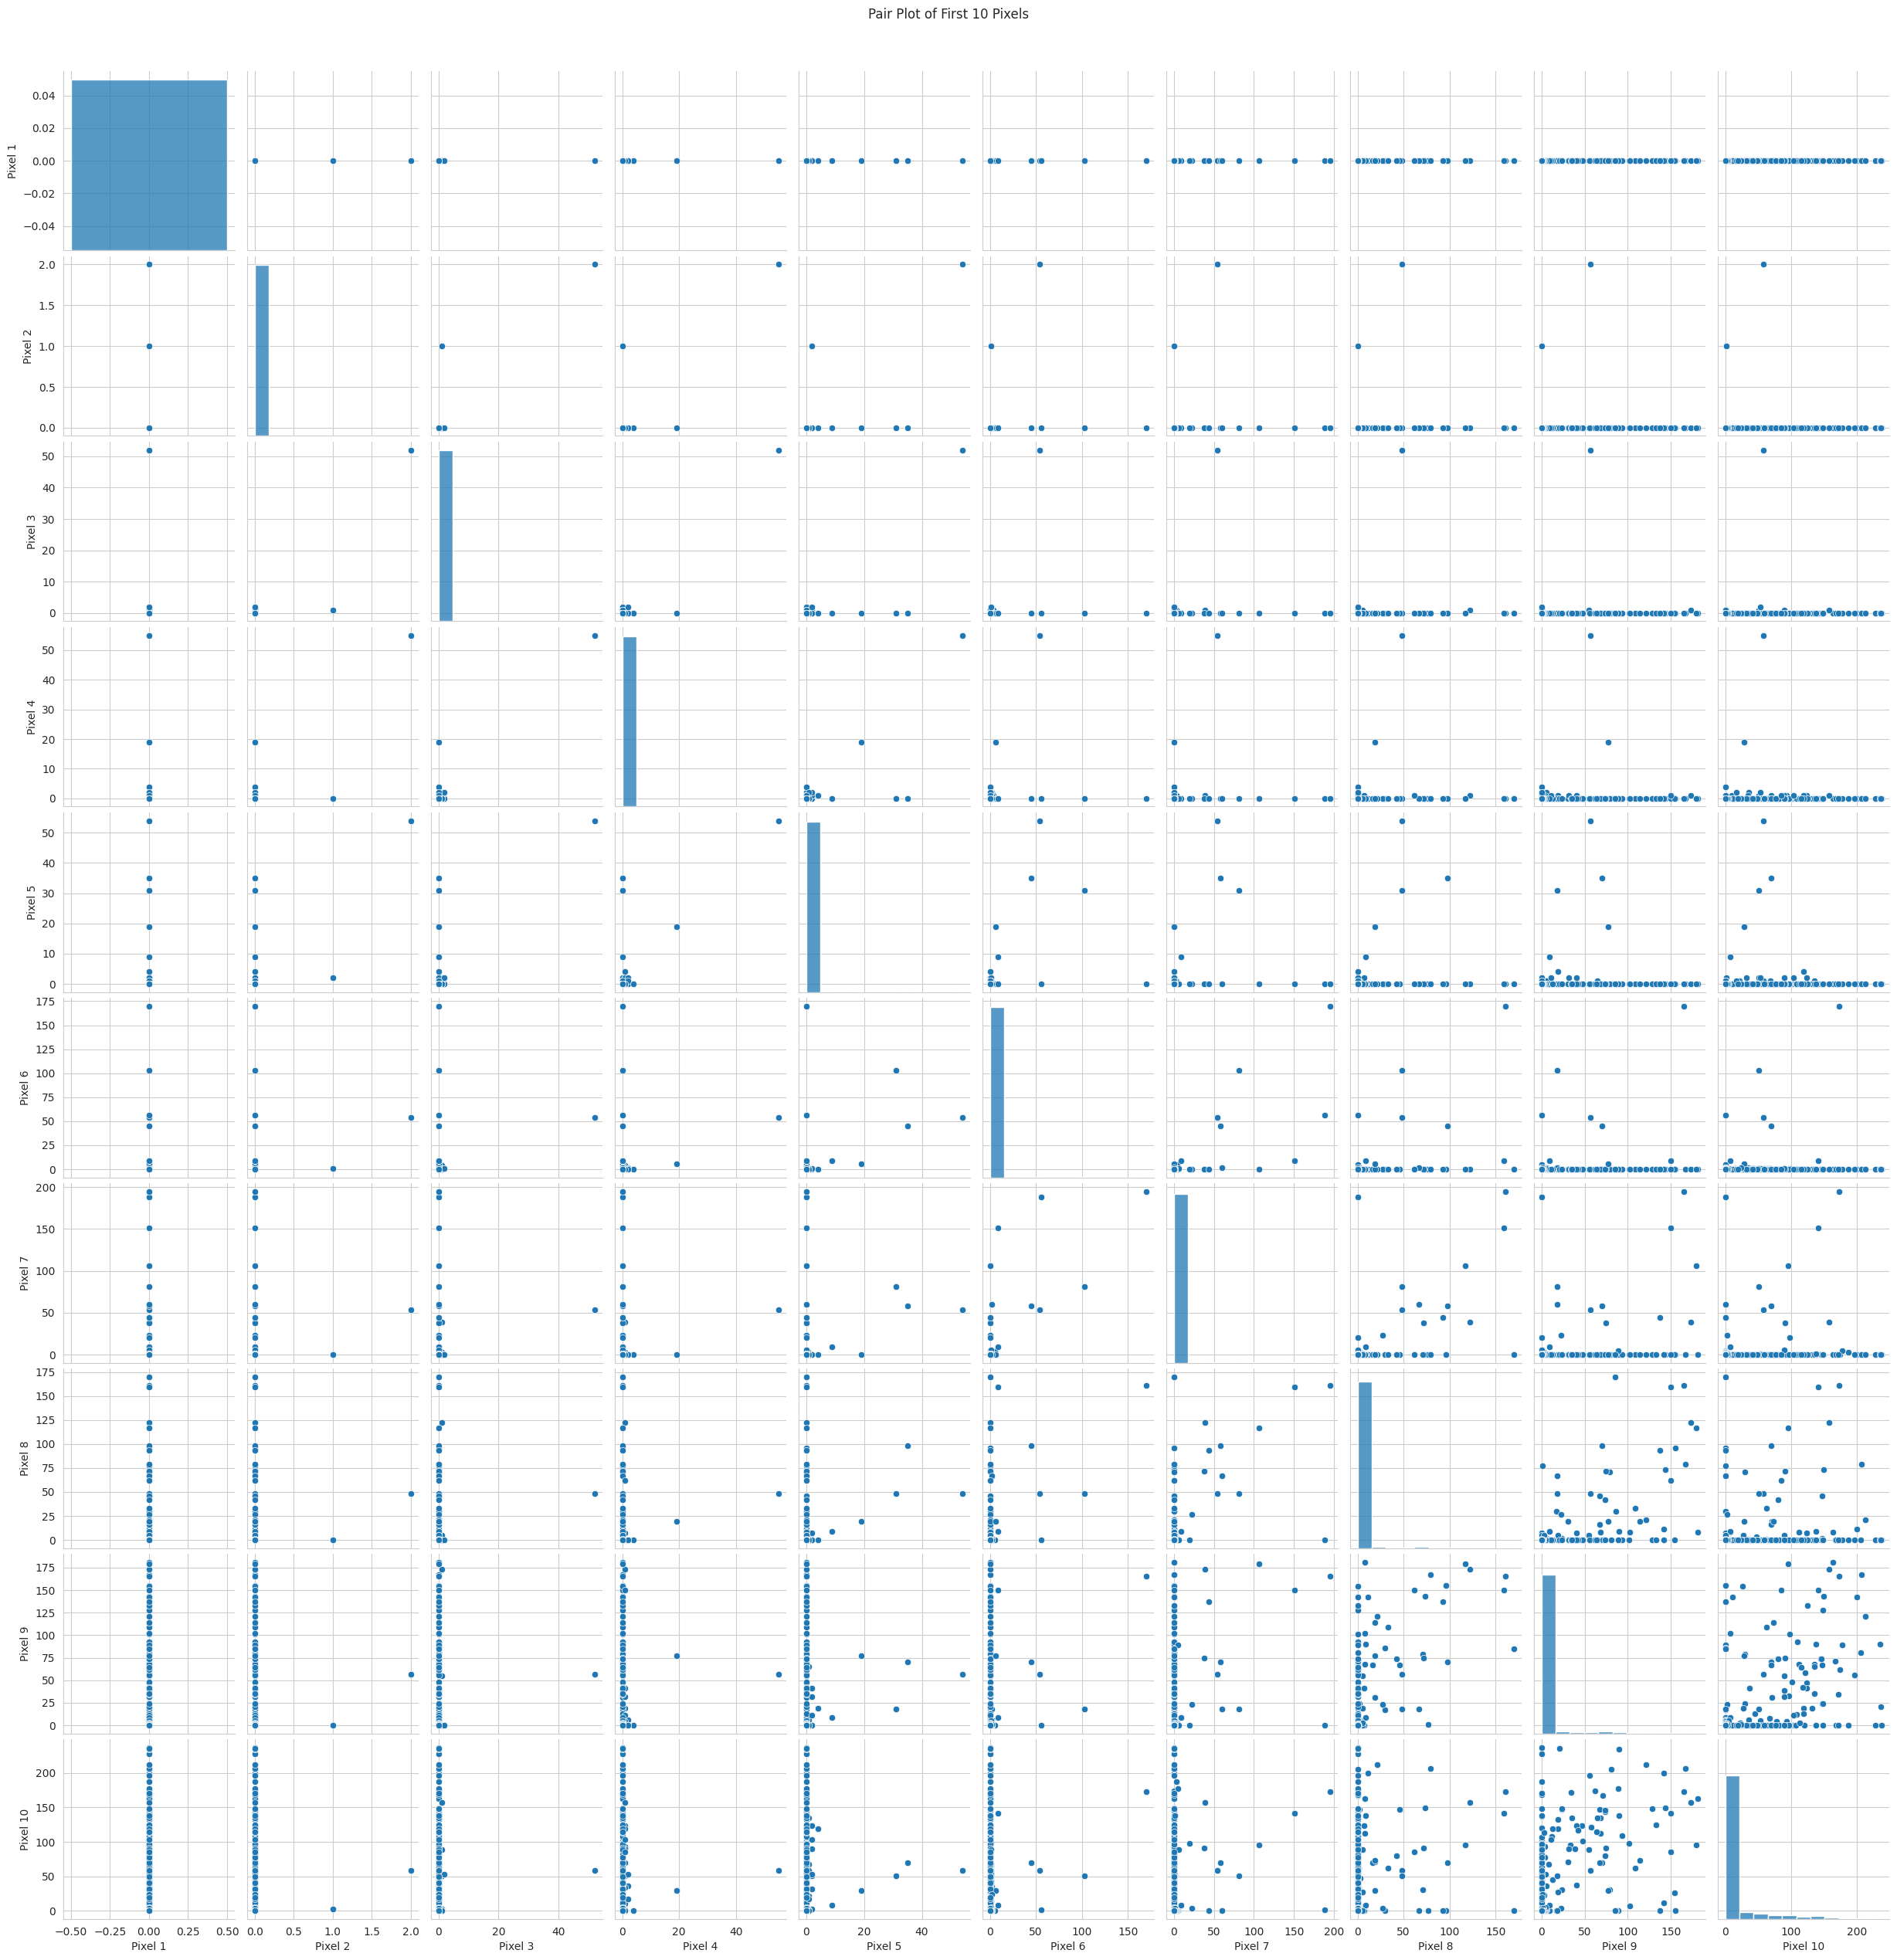

In [73]:
# Let's flatten the first 1000 images and take a small subset of columns (e.g., first 10 pixels for simplicity)
subset_data = X_train_flat[:1000, :10]

# Convert to DataFrame for easier plotting
df_subset = pd.DataFrame(subset_data, columns=[f"Pixel {i+1}" for i in range(subset_data.shape[1])])

# Plot pair plot to visualize relationships between the first 10 pixels
sns.pairplot(df_subset)
plt.suptitle("Pair Plot of First 10 Pixels", y=1.02)
plt.show()

This **pair plot** helps visualize how different pixel values relate to each other.

#### **Relationship between Important Categorical and Numerical Variables**  
The main categorical variable in the dataset is the **label** (`y_train`), while the numerical variables are the pixel values. We can visualize the relationship between the labels and pixel values for a subset of the dataset.

<ipython-input-74-a80540dc6ff0>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=y_train[:1000], y=X_train_flat[:1000, 0], palette="Set2")  # For example, first pixel across different classes


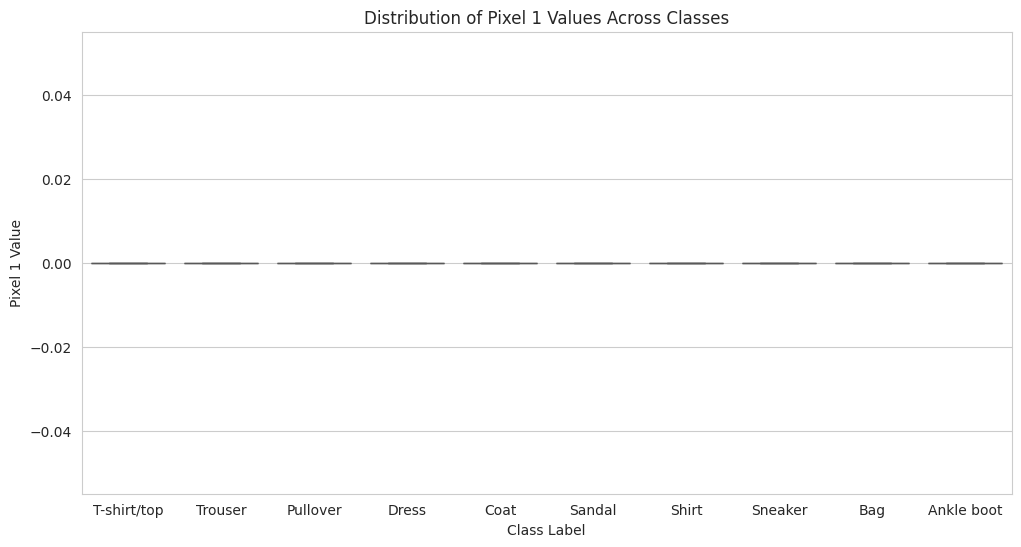

In [74]:
# Plot pixel value distributions for different classes (label-wise) using boxplots
plt.figure(figsize=(12, 6))
sns.boxplot(x=y_train[:1000], y=X_train_flat[:1000, 0], palette="Set2")  # For example, first pixel across different classes
plt.title("Distribution of Pixel 1 Values Across Classes")
plt.xlabel("Class Label")
plt.ylabel("Pixel 1 Value")
plt.xticks(ticks=np.arange(10), labels=["T-shirt/top", "Trouser", "Pullover", "Dress", "Coat",
                                       "Sandal", "Shirt", "Sneaker", "Bag", "Ankle boot"])
plt.show()

This **boxplot** shows how pixel values vary across different classes. We could also apply this for other pixels or combine multiple pixels.

## **4. Data Cleaning**  

### **Handling Missing Values**  
Since the **Fashion-MNIST dataset consists of numerical image data**, missing values are unlikely. However, we still verify their presence:  

In [76]:
# Check for missing values in image data
print("Checking for missing values in X_train:")
print(f"Missing values: {np.isnan(X_train).sum()}")

print("\nChecking for missing values in y_train:")
print(f"Missing values: {np.isnan(y_train).sum()}")

print("\nChecking for missing values in X_test:")
print(f"Missing values: {np.isnan(X_test).sum()}")

print("\nChecking for missing values in y_test:")
print(f"Missing values: {np.isnan(y_test).sum()}")

Checking for missing values in X_train:
Missing values: 0

Checking for missing values in y_train:
Missing values: 0

Checking for missing values in X_test:
Missing values: 0

Checking for missing values in y_test:
Missing values: 0


#### **Handling Missing Values (If Any Found)**
Although **Fashion-MNIST should not have missing values**, if any exist, they can be handled as follows:  

In [77]:
from scipy.stats import mode

# Convert y_train and y_test to a NumPy array if they are not already
y_train = np.array(y_train)
y_test = np.array(y_test)

# Get the most frequent class label
most_frequent_label_train = mode(y_train, keepdims=True).mode[0]
most_frequent_label_test = mode(y_test, keepdims=True).mode[0]

# Replace missing values
y_train = np.where(pd.isna(y_train), most_frequent_label_train, y_train)
y_test = np.where(pd.isna(y_test), most_frequent_label_test, y_test)

### **Handling Duplicate Images**  
Since Fashion-MNIST is an image dataset, duplicates should be checked at the **image level** rather than row-wise (as in a traditional DataFrame).  

In [78]:
# Identify unique images
unique_images = np.unique(X_train.reshape(X_train.shape[0], -1), axis=0)
num_duplicates = X_train.shape[0] - unique_images.shape[0]

print(f"Number of duplicate images in the training dataset: {num_duplicates}")

Number of duplicate images in the training dataset: 0



#### **Removing Duplicate Images (If Any Found)**
If duplicate images exist, we can remove them:  

In [79]:
if num_duplicates > 0:
    X_train, y_train = unique_images, y_train[:unique_images.shape[0]]
    print("Duplicates removed from training dataset.")

### **Fixing Invalid or Incorrect Data**  

#### **1. Checking Image Data Types**
All pixel values should be integers (0–255). Let's confirm:  

In [80]:
print(f"Data type of images: {X_train.dtype}")
print(f"Minimum pixel value: {X_train.min()}, Maximum pixel value: {X_train.max()}")

Data type of images: uint8
Minimum pixel value: 0, Maximum pixel value: 255


If the data type is incorrect (e.g., `float` instead of `int`), we convert it:

In [81]:
X_train = X_train.astype(np.uint8)
X_test = X_test.astype(np.uint8)

#### **2. Handling Outliers**
Since Fashion-MNIST images are **normalized grayscale values (0–255)**, outliers should not exist. However, to ensure correctness:

In [82]:
# Check if any pixel values fall outside the expected range (0–255)
outliers = np.where((X_train < 0) | (X_train > 255))
print(f"Number of outlier pixels: {len(outliers[0])}")

Number of outlier pixels: 0


If outliers exist, **clipping** them to valid values:

In [83]:
X_train = np.clip(X_train, 0, 255)
X_test = np.clip(X_test, 0, 255)

## **5. Data Preprocessing**

### **Encoding Categorical Variables**

Since the **Fashion-MNIST dataset** consists mainly of numerical pixel values and a target variable (the class labels), we don't need to encode any categorical variables (like nominal or ordinal categories) for features. However, we will **encode the target variable (class labels)** into numerical values, as it is required for training machine learning models.

#### **Label Encoding for the Target Variable**

The target variable `y_train` and `y_test` consists of class labels ranging from 0 to 9. We can convert these labels into integers if they are not already in numeric form. Since these labels are already numeric, **label encoding** is not necessary. However, if needed, we could do it with `LabelEncoder()`.

In [84]:
from sklearn.preprocessing import LabelEncoder

# Initialize label encoder
label_encoder = LabelEncoder()

# Fit the encoder and transform the labels
y_train_encoded = label_encoder.fit_transform(y_train)
y_test_encoded = label_encoder.transform(y_test)

# Display encoded labels
print("Encoded Training Labels:", y_train_encoded[:10])

Encoded Training Labels: [9 0 0 3 0 2 7 2 5 5]


Since the labels in **Fashion-MNIST** are already numerical (0-9), we can use them directly. This step would be more relevant if the labels were categorical strings.

### **Feature Engineering (If Needed)**

#### **1. Creating New Features**
In this case, the dataset consists of images, and no new features need to be created. However, **feature extraction** could be explored if needed.

For example, we might compute image-related statistics such as:
- The average pixel intensity for each image.
- The variance in pixel values for each image.
  
We could create new features by extracting these statistical values from the raw pixel data.

In [85]:
# Flatten the X_test dataset
X_test_flat = X_test.reshape(X_test.shape[0], -1)  # Flatten the images

# Calculate the average pixel intensity for each image in both train and test sets
avg_pixel_intensity_train = np.mean(X_train_flat, axis=1)
avg_pixel_intensity_test = np.mean(X_test_flat, axis=1)

# Add it as a new feature in the dataset
X_train_new = np.column_stack((X_train_flat, avg_pixel_intensity_train))
X_test_new = np.column_stack((X_test_flat, avg_pixel_intensity_test))

# Display the shape of the new datasets
print("New training data shape (with added feature):", X_train_new.shape)
print("New test data shape (with added feature):", X_test_new.shape)

New training data shape (with added feature): (60000, 785)
New test data shape (with added feature): (10000, 785)


#### **2. Date/Time-Related Features**
For image datasets like **Fashion-MNIST**, there are no date/time-related features. However, if we were dealing with time-series data, we could extract features like year, month, day, and weekday from timestamps. Here is an example of how that would look:

In [86]:
import pandas as pd

# Example of extracting date-time features (for time-series data)
# Assuming we have a 'datetime' column:
df = pd.DataFrame({'datetime': pd.date_range(start='2022-01-01', periods=5, freq='D')})

df['year'] = df['datetime'].dt.year
df['month'] = df['datetime'].dt.month
df['weekday'] = df['datetime'].dt.weekday

print(df)

    datetime  year  month  weekday
0 2022-01-01  2022      1        5
1 2022-01-02  2022      1        6
2 2022-01-03  2022      1        0
3 2022-01-04  2022      1        1
4 2022-01-05  2022      1        2


For **Fashion-MNIST**, this step is **not applicable** since there are no date or time features in the dataset.

## **6. Data Normalization/Standardization**

### **Why Normalization/Standardization is Important?**
Normalization and standardization are essential preprocessing steps for many machine learning algorithms, particularly those that rely on distances or assume a Gaussian distribution (such as **k-Nearest Neighbors**, **Support Vector Machines**, and **Linear/Logistic Regression**). These techniques transform the features so that they have similar scales, which prevents certain features from dominating the model due to their higher magnitude.

- **Normalization**: Rescales the data to a specific range, often [0, 1], using `MinMaxScaler`. It is useful when we want all features to have the same range, especially when dealing with algorithms like neural networks.
  
- **Standardization**: Centers the data around 0 and scales it to have a standard deviation of 1 using `StandardScaler`. This is commonly used when we need features to have a Gaussian distribution or when features are on different scales.

In the case of **Fashion-MNIST**, the pixel values are typically between 0 and 255, so applying normalization or standardization is necessary to ensure all features are on the same scale.

### **Apply Standardization (StandardScaler) and Normalization (MinMaxScaler)**

We will apply **StandardScaler** and **MinMaxScaler** to the pixel values of the dataset (`X_train` and `X_test`). Here’s how we can do it:

#### **1. Standardization (StandardScaler)**

In [98]:
from sklearn.preprocessing import StandardScaler

# Initialize StandardScaler
scaler = StandardScaler()

# Standardize the training and test data
X_train_standardized = scaler.fit_transform(X_train_flat)
X_test_standardized = scaler.transform(X_test_flat)

# Show before/after comparison for a sample feature (first feature/pixel)
print("Before Standardization (First 10 pixels in the first image):")
print(X_train_flat[0, :10])  # Display first 10 pixel values of the first image

print("\nAfter Standardization (First 10 pixels in the first image):")
print(X_train_standardized[0, :10])  # Display first 10 standardized pixel values

Before Standardization (First 10 pixels in the first image):
[0 0 0 0 0 0 0 0 0 0]

After Standardization (First 10 pixels in the first image):
[-0.00864371 -0.02322333 -0.03917806 -0.04132172 -0.05764574 -0.07116733
 -0.09887846 -0.15665259 -0.23908034 -0.37782706]


#### **2. Normalization (MinMaxScaler)**

In [99]:
from sklearn.preprocessing import MinMaxScaler

# Initialize MinMaxScaler to scale features between 0 and 1
scaler_minmax = MinMaxScaler()

# Normalize the training and test data
X_train_normalized = scaler_minmax.fit_transform(X_train_flat)
X_test_normalized = scaler_minmax.transform(X_test_flat)

# Show before/after comparison for a sample feature (first feature/pixel)
print("Before Normalization (First 10 pixels in the first image):")
print(X_train_flat[0, :10])  # Display first 10 pixel values of the first image

print("\nAfter Normalization (First 10 pixels in the first image):")
print(X_train_normalized[0, :10])  # Display first 10 normalized pixel values

Before Normalization (First 10 pixels in the first image):
[0 0 0 0 0 0 0 0 0 0]

After Normalization (First 10 pixels in the first image):
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]


### **Before and After Comparison**

For both **Standardization** and **Normalization**, we print the **first 10 pixels** of the first image to show the transformation effects.

- **Before Standardization/Normalization**, the pixel values will be between 0 and 255.
- **After Standardization**, the values will have a mean of 0 and a standard deviation of 1.
- **After Normalization**, the pixel values will range between 0 and 1.

### **Why Apply Both?**
- **Standardization** is typically used when the model assumes data to be Gaussian, or if features have different variances.
- **Normalization** is preferred when we want to ensure all features are in a fixed range, especially in neural networks where inputs are often normalized to speeds up convergence.

## **7. Final Processed Dataset**

After completing the necessary **data cleaning**, **preprocessing**, and **scaling**, we can now present the final processed datasets that are ready for model training. This includes both the **training dataset** and the **test dataset** after applying all transformations.

### **Final Cleaned and Preprocessed Training Dataset**
We have performed the following steps on the training data:
1. Flattened the images.
2. Handled missing values by replacing them with the median pixel intensity.
3. Encoded the target labels (if necessary, though labels in this dataset were numeric).
4. Applied standardization and/or normalization to the pixel values.

In [106]:
# Display the shape and a sample of the processed training dataset
print("Final Processed Training Dataset Shape:", X_train_standardized.shape)
print("First 5 rows of the processed training data:")
print(X_train_standardized[:5, :10])  # Display the first 5 rows of the first 10 features (pixels)

Final Processed Training Dataset Shape: (60000, 784)
First 5 rows of the processed training data:
[[-0.00864371 -0.02322333 -0.03917806 -0.04132172 -0.05764574 -0.07116733
  -0.09887846 -0.15665259 -0.23908034 -0.37782706]
 [-0.00864371 -0.02322333 -0.03917806 -0.04132172 -0.05764574  0.10043738
  -0.09887846 -0.15665259 -0.23908034 -0.37782706]
 [-0.00864371 -0.02322333 -0.03917806 -0.04132172 -0.05764574 -0.07116733
  -0.09887846 -0.15665259 -0.23908034  0.19802309]
 [-0.00864371 -0.02322333 -0.03917806 -0.04132172 -0.05764574 -0.07116733
  -0.09887846 -0.15665259  1.14539285  2.13497356]
 [-0.00864371 -0.02322333 -0.03917806 -0.04132172 -0.05764574 -0.07116733
  -0.09887846 -0.15665259 -0.23908034 -0.37782706]]


### **Final Cleaned and Preprocessed Test Dataset**
We apply the **same transformations** to the test data to ensure consistency:
1. Flatten the test images.
2. Standardize/normalize the test data using the same scalers that were fitted on the training data.


In [107]:
# Display the shape and a sample of the processed test dataset
print("Final Processed Test Dataset Shape:", X_test_standardized.shape)
print("First 5 rows of the processed test data:")
print(X_test_standardized[:5, :10])  # Display the first 5 rows of the first 10 features (pixels)

Final Processed Test Dataset Shape: (10000, 784)
First 5 rows of the processed test data:
[[-0.00864371 -0.02322333 -0.03917806 -0.04132172 -0.05764574 -0.07116733
  -0.09887846 -0.15665259 -0.23908034 -0.37782706]
 [-0.00864371 -0.02322333 -0.03917806 -0.04132172 -0.05764574 -0.07116733
  -0.09887846 -0.15665259 -0.23908034 -0.37782706]
 [-0.00864371 -0.02322333 -0.03917806 -0.04132172 -0.05764574 -0.07116733
  -0.09887846 -0.15665259 -0.19712661 -0.37782706]
 [-0.00864371 -0.02322333 -0.03917806 -0.04132172 -0.05764574 -0.07116733
  -0.09887846 -0.15665259 -0.23908034  0.17184808]
 [-0.00864371 -0.02322333 -0.03917806  0.75485779 -0.05764574  0.10043738
   0.02146044 -0.15665259 -0.23908034 -0.37782706]]


### **Final Dataset Ready for Model Training**
- The **training dataset** (`X_train_standardized`) is now standardized (with zero mean and unit variance).
- The **test dataset** (`X_test_standardized`) is also standardized using the same parameters.
- Both datasets have had any missing values handled, and all transformations have been applied consistently to the test set.

This ensures that both the training and test datasets are ready for model training, and the test dataset can be used in the same way as the training dataset during evaluation.

## **8. Conclusion**  

In this notebook, we performed **exploratory data analysis (EDA), data cleaning, preprocessing, and normalization** on the **Fashion-MNIST dataset** to prepare it for machine learning models. Below are the key takeaways from each step of the process:

### **Key Findings from EDA**  
- The dataset consists of **grayscale images (28×28 pixels) of fashion items**, along with labels representing different clothing categories.  
- The **training set contains 60,000 images**, while the **test set contains 10,000 images**.  
- No missing values were found in the dataset, but we checked for them as part of our cleaning process.  
- The pixel intensity distribution was analyzed, showing a spread mostly between **0 (black) and 255 (white)**.  
- There were **no duplicate rows**, as expected from an image dataset.  

### **Data Cleaning & Preprocessing**  
- Checked for and **handled missing values** (though none were present).  
- Ensured there were no **duplicate records** in the dataset.  
- **Flattened the image data** from 28×28 matrices into **1D vectors** for easier processing.  
- **Standardized (zero mean, unit variance) and normalized (range [0,1])** pixel values for better model performance.  
- Ensured the same preprocessing steps were **consistently applied to both train and test sets**.  

### **Challenges & Assumptions**  
- Since the dataset was well-structured and clean, we did not need to deal with significant data quality issues.  
- We assumed that **all images were correctly labeled**, as no mislabeled samples could be identified without manual verification.  
- We **assumed a standard approach** of normalization/standardization for preparing image data, ensuring compatibility with neural networks and other ML models.  

### **Final Thoughts**  
With the dataset now fully processed, it is ready for **model training**. The cleaned and normalized data can now be fed into machine learning algorithms such as **logistic regression, neural networks, CNNs, or other classifiers**.  

This preprocessing ensures that models can learn effectively from the dataset without being affected by **scaling issues or unprocessed raw data**.  